Fieldtrip: Resting State analysis pipeline
==========================================

Authors: Hadi Zaatiti <hadi.zaatiti@nyu.edu>, Karima Raafat, <karima.raafat@nyu.edu>

This notebook is to be run in MATLAB, while having fieldtrip library installed.
It is a pipeline for processing the `Resting State` experiment raw data acquired from KIT-MEG system at NYUAD, run frequency analysis in sensor space.
The main outcome is a comparison plot of the power of the alpha-band (8-14Hz) for two conditions: eyes closed and eyes open.

A higher alpha-band power should be observed in the eyes closed data segment than in eyes open.

The `Resting State` code experiment in Psychtoolbox can be found here:

[Resting State Experiment page](https://meg-pipeline.readthedocs.io/en/latest/3-experimentdesign/experiments/1-exp-resting-state.html)

Importing data 
--------------

The data used in this notebook is hosted on `NYU BOX`. Permissions are given upon request.

- Install the BOX app from [here](https://www.box.com/resources/downloads)
- Set an environment variable with name `MEG_DATA` to the path of the Data folder e.g.,
    - `C:\Users\user_name\Box\MEG\Data`
    - or `C:\Users\user_name\Box\Data

MATLAB setup
------------

Make sure that:
- Fieldtrip is installed in MATLAB
- Add to MATLAB path the custom-made functions for NYUAD MEG lab found [here](https://github.com/Hzaatiti/meg-pipeline/tree/main/pipeline/field_trip_pipelines/matlab_functions)

Each experiment run using the KIT system generates a `.con` file and two or more .mrk files.

In [3]:
%% Resting state task pipeline

MEG_DATA_FOLDER = getenv('MEG_DATA');

TASK_NAME = 'resting-state\';

% Set path to KIT .con file of sub-03
DATASET_PATH = [MEG_DATA_FOLDER, TASK_NAME];

%THis needs fixing to sav eproperly
SAVE_PATH = [MEG_DATA_FOLDER, TASK_NAME];

SYSTEM  = 'meg-kit2\';
SUB_ID = 'sub-01\';

CLOSED_EYES = [DATASET_PATH, SUB_ID, SYSTEM, 'closed_resting_01.con'];

OPEN_EYES = [DATASET_PATH, SUB_ID, SYSTEM, 'open_resting_02.con'];

Preprocess the data.

In [4]:
%% Preprocess data

% Preprocess the MEG data
cfg = [];
cfg.dataset = CLOSED_EYES;
cfg.coilaccuracy = 0;
data_CLOSED_EYES = ft_preprocessing(cfg);

% Preprocess the MEG data
cfg = [];
cfg.dataset = OPEN_EYES;
cfg.coilaccuracy = 0;
data_OPEN_EYES = ft_preprocessing(cfg);

-------------------------------------------------------------------------------------------
FieldTrip is developed by members and collaborators of the Donders Institute for Brain,
Cognition and Behaviour at Radboud University, Nijmegen, the Netherlands.

                          --------------------------
                        /                            \
                     ------------------------------------
                    /                                    \
          -------------------------------------------------
         /                            /\/\/\/\/\ 
         ---------------------------------------------------
                  |        F  i  e  l  d  T  r  i  p       |
                  ------------------------------------------
                   \                                      /
                     ------------------------------------
                          \            /
                            ----------

Please cite the FieldTrip re

We can now define two trials, one for eyes closed and one for eyes open.

In [5]:
  %% Define trials and segment the data: CLOSED EYES

    previewTrigger = data_CLOSED_EYES.trial{1}(225, :);

    MIN_trig = min(previewTrigger);
    MAX_trig = max(previewTrigger);

    threshold = (max(previewTrigger) + min(previewTrigger)) / 2;

    cfg = [];
    cfg.dataset  = CLOSED_EYES;
    cfg.trialdef.eventvalue = 1; % placeholder for the conditions
    cfg.trialdef.prestim    = 0; % 1s before stimulus onset
    cfg.trialdef.poststim   = 200; % 1s after stimulus onset
    cfg.trialfun = 'ft_trialfun_general';
    cfg.trialdef.chanindx = 225;
    cfg.trialdef.threshold = threshold;
    cfg.trialdef.eventtype = 'combined_binary_trigger'; % this will be the type of the event if combinebinary = true
    cfg.trialdef.combinebinary = 1;

    CFG_TRIALS_CLOSED_EYES = ft_definetrial(cfg);
    
    ft_trialfun_show(CFG_TRIALS_CLOSED_EYES);

    SG_CLOSED_EYES = ft_preprocessing(CFG_TRIALS_CLOSED_EYES);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\resting-state\sub-01\meg-kit2\closed_resting_01.con'
reading the events from 'C:\Users\hz3752\Box\MEG\Data\resting-state\sub-01\meg-kit2\closed_resting_01.con'
found 1 events
created 1 trials
the call to "ft_definetrial" took 5 seconds
using the events from the configuration structure
the following events were found in the data:

event type: 'combined_binary_trigger' 
with event values : 1
these values occur: 1 times

processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057'

The open eyes data is the whole dataset, therefore to define this trial we will not be using any trigger channel, but rather define the trial from the 38000 to 238000 sample. (Sampling Frequency is 1kHz).

In [1]:
    %% Define trials and segment the data: OPEN EYES
    % This segment is a whole trial on its own, we do not need to use a trigger channel for it
cfg = [];
cfg.dataset = OPEN_EYES;
hdr = ft_read_header(cfg.dataset);
cfg = [];
cfg.dataset = OPEN_EYES;
start_sample = 38000;  % Start from the first sample
end_sample = 238000;  % End at the last sample (or specify your duration in samples)


cfg.trl = [start_sample end_sample 0];  % 0 offset means no time shift

% Proceed to preprocess using the defined trial
SG_OPEN_EYES = ft_preprocessing(cfg);

processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057' 'AG058' 'AG059' 'AG060' 'AG061' 'AG062' 'AG063' 'AG064' 'AG065' 'AG066' 'AG067' 'AG068' 'AG069' 'AG070' 'AG071' 'AG072' 'AG073' 'AG074' 'AG075' 'AG076' 'AG077' 'AG078' 'AG079' 'AG080' 'AG081' 'AG082' 'AG083' 'AG084' 'AG085' 'AG086' 'AG087' 'AG088' 'AG089' 'AG090' 'AG091' 'RM092' 'AG093' 'AG094' 'AG095' 'AG096' 'AG097' 'AG098' 'AG099' 'AG100' 'AG101' 'AG102' 'AG103' 'AG104' 'AG105' 'AG106' 'AG107' 'AG108' 'AG109' 'AG110' 'AG111' 'AG112' 'AG113' 'AG114' 'AG115' 'AG116' 'AG117' 'AG118' 'AG119' 'AG120' 'AG121' 'AG122' 'AG

creating layout from cfg.grad
creating layout for yokogawa208 system
the call to "ft_prepare_layout" took 0 seconds
reading layout from file CTF151_helmet.mat
reading 'layout' from file 'CTF151_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


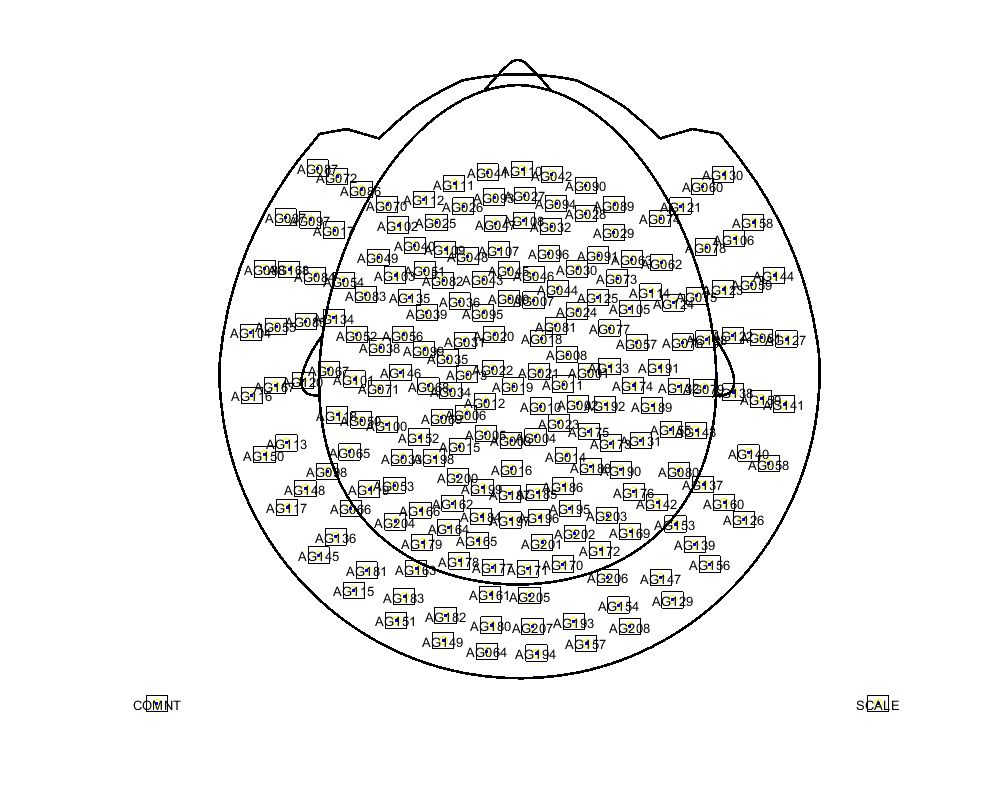

In [4]:
%% Create KIT sensor Layout

% This is a custom made function by Osama Abdullah to create the KIT sensor
% layout at NYUAD
kit_layout = create_kit_layout(CLOSED_EYES);

% Plot the KIT sensors layout

figure('Position', [100, 100, 1000, 800]); % Adjust the width and height (1000 and 800) as needed
ft_plot_layout(kit_layout, 'box', 1);

We will pick one sensor that is in the Occipital lobe, the `AG205`, compute the Fast Fourier Transform (FFT) for each trial type (eyes closed, eyes open) for the measurement provided by this sensor.
The data is segmented by overlapping `Hanning` windows, FFT is computed for each window then averaged across the whole trial.

In [5]:
%% FFT analysis in alpha band

SENSOR_NAME = 'AG205';

% FFT configuration for the first segment (2-30 Hz), for a specific channel
cfg = [];
cfg.method = 'mtmfft';              % Multitaper method for FFT
cfg.foilim = [2 30];                % Frequency range: 2-30 Hz
cfg.taper = 'hanning';              % Use Hanning taper for narrowband
cfg.output = 'pow';                 % Output power spectrum
cfg.channel = SENSOR_NAME;  % Specify the channel name (replace 'your_channel_name' with the actual name)
freq_CLOSED_EYES = ft_freqanalysis(cfg, SG_CLOSED_EYES);

% FFT configuration for the second segment (2-30 Hz), for the same specific channel
cfg = [];
cfg.method = 'mtmfft';              % Multitaper method for FFT
cfg.foilim = [2 30];                % Frequency range: 2-30 Hz
cfg.taper = 'hanning';              % Use Hanning taper for narrowband
cfg.output = 'pow';                 % Output power spectrum
cfg.channel = SENSOR_NAME;  % Specify the same channel name for the second segment
freq_OPEN_EYES = ft_freqanalysis(cfg, SG_OPEN_EYES);

the input is raw data with 256 channels and 1 trials
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials
processing trial 1/1 nfft: 200000 samples, datalength: 200000 samples, 1 tapers
the call to "ft_freqanalysis" took 1 seconds
the input is raw data with 256 channels and 1 trials
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials
processing trial 1/1 nfft: 200001 samples, datalength: 200001 samples, 1 tapers
the call to "ft_freqanalysis" took 0 seconds


We can now plot the Power spectrum and compare the difference in alpha-band power for the two conditions (Eyes closed, blue and Eyes open, red).

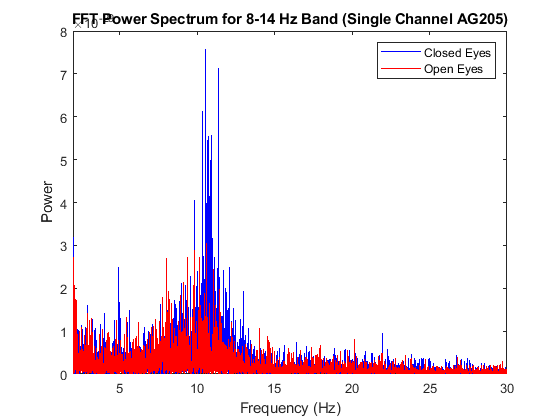

In [7]:
%% Plot 

% Plot the power spectrum for Closed Eyes (for AG205)
figure('Position', [100, 100, 1200, 800]);  % Adjust width and height to desired size
plot(freq_CLOSED_EYES.freq, freq_CLOSED_EYES.powspctrm, 'b'); 
hold on;

% Plot the power spectrum for Open Eyes (for AG205)
plot(freq_OPEN_EYES.freq, freq_OPEN_EYES.powspctrm, 'r'); % 

% Customize the plot
xlabel('Frequency (Hz)');
ylabel('Power');
title('FFT Power Spectrum for 8-14 Hz Band (Single Channel AG205)');
legend('Closed Eyes', 'Open Eyes');
xlim([2 30]); 
hold off;